# Social Cost of Commuting Convenience

These instructions should ensure we have the same environment and datafiles.

* Ensure you have the latest environment from the [git repository](https://github.com/rohancalum/social-cost-convenience/tree/master/docs).
* Ensure you have latest version of [OpenTripPlanner directory](https://drive.google.com/drive/folders/1dpiakMyGko6VMJlpvm_1ocqv_2PX69bZ?usp=sharing) locally. 
* In a new terminal, navigate to the OpenTripPlanner directory. 
* Launch OTP server: `java -Xmx2G -jar otp-1.3.0-shaded.jar --build . --inMemory`
* Activate environment `conda activate geoPython3`
* Restart Jupyter kernel if need be. 

In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('../'))

In [104]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import pandas as pd
# Import local modules
from src import download, process, router 

In [39]:
cd '/Users/rohannuttall/Desktop/src/social-cost-convenience/src'

/Users/rohannuttall/Desktop/src/social-cost-convenience/src


## Get some processed data

In [40]:
# List cities 
city_names = router.get_city_names()
print('City names: ', city_names)

City names:  ['New York, NY', 'Los Angeles, CA', 'Chicago, IL', 'Houston, TX', 'Phoenix, AZ', 'Philadelphia, PA', 'San Antonio, TX', 'San Diego, CA', 'Dallas, TX', 'San Jose, CA', 'Austin, TX', 'Jacksonville, FL', 'Fort Worth, TX', 'Columbus, OH', 'San Francisco, CA', 'Charlotte, NC', 'Indianapolis, IN', 'Seattle, WA', 'Denver, CO', 'Washington, DC']


In [41]:
# List processed data for Seattle
i = -3; j = -2 # This pulls out Seattle's index from "city_names"
for city in city_names[i:j]:
    print("City: ", city)
    df = router.read_processed_data(city[:-4], year = 2017) # "city[:-4]" removes ", WA"
    print("RAC Data: ", df.columns.values)

City:  Seattle, WA
RAC Data:  ['year' 'st' 'stname' 'cty' 'ctyname' 'trct' 'trctname' 'c000' 'ca01'
 'ca02' 'ca03' 'ce01' 'ce02' 'ce03' 'cns01' 'cns02' 'cns03' 'cns04'
 'cns05' 'cns06' 'cns07' 'cns08' 'cns09' 'cns10' 'cns11' 'cns12' 'cns13'
 'cns14' 'cns15' 'cns16' 'cns17' 'cns18' 'cns19' 'cns20' 'cr01' 'cr02'
 'cr03' 'cr04' 'cr05' 'cr07' 'ct01' 'ct02' 'cd01' 'cd02' 'cd03' 'cd04'
 'cs01' 'cs02' 'tract' 'lat' 'lon' 'coord']


In [132]:
df.head(5)

,year,st,stname,cty,ctyname,trct,trctname,c000,ca01,ca02,...,cd01,cd02,cd03,cd04,cs01,cs02,tract,lat,lon,coord
0,2013,53,Washington,53033,"King County, WA",53033000600,"6 (King, WA)",4192,919,2425,...,260,722,982,1309,2093,2099,000600,47.71791781511426,-122.33253160976562,"47.71791781511426,-122.33253160976562"
1,2013,53,Washington,53033,"King County, WA",53033008100,"81 (King, WA)",1948,431,1155,...,96,302,442,677,1173,775,008100,47.606231773346394,-122.33924001169345,"47.606231773346394,-122.33924001169345"
2,2013,53,Washington,53033,"King County, WA",53033003000,"30 (King, WA)",2947,447,1915,...,145,481,728,1146,1460,1487,003000,47.68509616822083,-122.37404441604501,"47.68509616822083,-122.37404441604501"
3,2013,53,Washington,53033,"King County, WA",53033001702,"17.02 (King, WA)",2129,403,1334,...,149,372,500,705,1034,1095,001702,47.69652155278548,-122.36394815485704,"47.69652155278548,-122.36394815485704"
4,2013,53,Washington,53033,"King County, WA",53033003100,"31 (King, WA)",3200,507,1980,...,170,531,811,1181,1602,1598,003100,47.68695093426059,-122.39641076534267,"47.68695093426059,-122.39641076534267"


In [45]:
# Get geodata for city
city = 'Seattle, WA'
gd = process.get_city_geodata(city_name = city) # might take ~20 seconds

Returning geodata...
Matched: Seattle, WA to Seattle city within layer Incorporated Places
Saving geodata...


## Plot some geodata...

This largely doesn't work as there are issues with the different 'epsg' formats/scales of centroid boundary files and the centroids.

In [72]:
import geopandas as gpd
from shapely.geometry import Point

In [130]:
def plot_centroids(geodata: pd.DataFrame, city_name: str) -> gpd.GeoDataFrame:
    '''
    Plots centroids for testing. 
    See: https://geopandas.org/gallery/create_geopandas_from_pandas.html?highlight=points_from_xy
    
    '''    
    #TODO: Fix this.

    tracts = gpd.GeoDataFrame(geometry = geodata['geometry'].copy())
    centroids =  [Point(x, y) for x, y in zip(df['lat'].apply(float), df['lon'].apply(float))]
    geo_df = gpd.GeoDataFrame(gd[:-2], geometry = centroids) # funkiness here, not sure why len(centroids) is 105, but gd is len 107

    # This should convert things to the right scale... 
    geo_df.crs =({'init': 'epsg:3857'})
    geo_df = geo_df.to_crs({'init': 'epsg:3857'})
    
    tracts.crs =({'init': 'epsg:3857'})
    tracts = tracts.to_crs({'init': 'epsg:3857'})

    fig, ax = plt.subplots(figsize = (10,10))
    #tracts.plot(ax = ax, color='white', edgecolor='black') # Uncomment this to see why it breaks
    geo_df.plot(ax = ax, color = 'r') 
    ax.set_title(city_name)
    print("This is broken")
    return tracts

This is broken


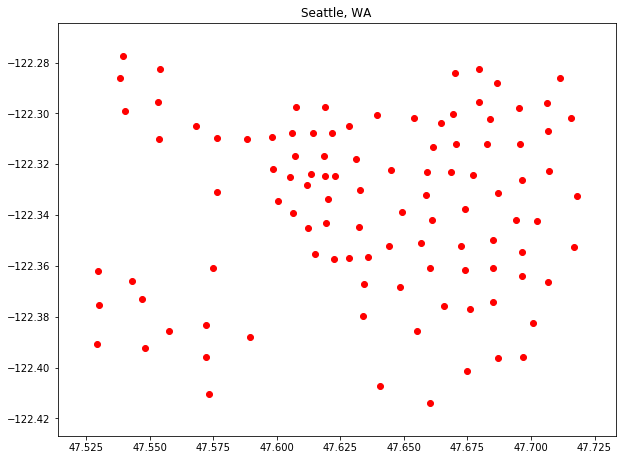

In [129]:
tracts = plot_centroids(gd, city)

## Routing


In [133]:
# For some reason, OTP is not working. It can't find the gtfs files in the directories.

# Warnings produced by OTP server: 
"""
16:23:43.182 WARN (GraphBuilder.java:220) Skipping unrecognized file './.DS_Store'
16:23:43.182 WARN (GraphBuilder.java:220) Skipping unrecognized file './gtfs'
16:23:43.185 INFO (GraphBuilder.java:204) Found GTFS file ./gtfs.zip
16:23:43.185 WARN (GraphBuilder.java:220) Skipping unrecognized file './lucene'
16:23:43.185 WARN (GraphBuilder.java:220) Skipping unrecognized file './otp-1.3.0-shaded.jar'
16:23:43.185 WARN (GraphBuilder.java:220) Skipping unrecognized file './Portland'
16:23:43.186 WARN (GraphBuilder.java:220) Skipping unrecognized file './Seattle'
16:23:43.186 WARN (GraphBuilder.java:220) Skipping unrecognized file './Vancouver'
        
"""

"\n16:23:43.182 WARN (GraphBuilder.java:220) Skipping unrecognized file './.DS_Store'\n16:23:43.182 WARN (GraphBuilder.java:220) Skipping unrecognized file './gtfs'\n16:23:43.185 INFO (GraphBuilder.java:204) Found GTFS file ./gtfs.zip\n16:23:43.185 WARN (GraphBuilder.java:220) Skipping unrecognized file './lucene'\n16:23:43.185 WARN (GraphBuilder.java:220) Skipping unrecognized file './otp-1.3.0-shaded.jar'\n16:23:43.185 WARN (GraphBuilder.java:220) Skipping unrecognized file './Portland'\n16:23:43.186 WARN (GraphBuilder.java:220) Skipping unrecognized file './Seattle'\n16:23:43.186 WARN (GraphBuilder.java:220) Skipping unrecognized file './Vancouver'\n        \n"

In [44]:
!python router.py 

Coordinate:  0       47.71791781511426,-122.33253160976562
1      47.606231773346394,-122.33924001169345
2       47.68509616822083,-122.37404441604501
3       47.69652155278548,-122.36394815485704
4       47.68695093426059,-122.39641076534267
                        ...                  
100     47.67719159122908,-122.32420521724731
101     47.68508761549853,-122.36064664456066
102       47.6539147051427,-122.3018653504803
103     47.61998870072279,-122.33351631094172
104     47.65519432029159,-122.38558705901774
Name: coord, Length: 105, dtype: object
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specif

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be

No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be safely accessible.
No trip found. There may be no transit service within the maximum specified distance or at the specified time, or your start or end point might not be